##telecomCustomerChurnPrediction

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
df=pd.read_csv('Telco_Customer_Churn1.csv')

#dataPreprocessing

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'PhoneService': ['No' 'Yes']
Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet serv

In [35]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']:
  df[col] = df[col].astype("category")

In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [37]:
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [38]:
df.drop("customerID",axis=1,inplace=True)

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.duplicated().sum()

22

In [41]:
df.shape

(7043, 20)

In [42]:
df[df.duplicated()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [43]:
df.shape

(7043, 20)

In [44]:
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
     'PaymentMethod','Churn']:
  df[i] = LabelEncoder().fit_transform(df[i])

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [47]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [48]:
df.shape

(7043, 20)

In [49]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

#handling numerical values

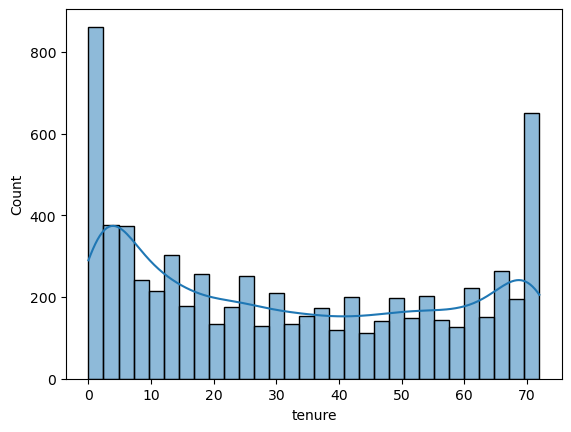

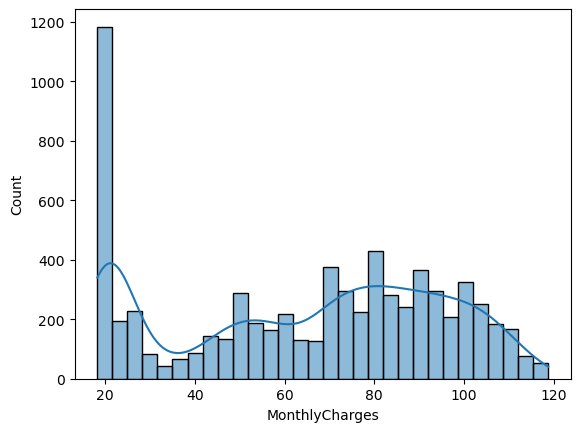

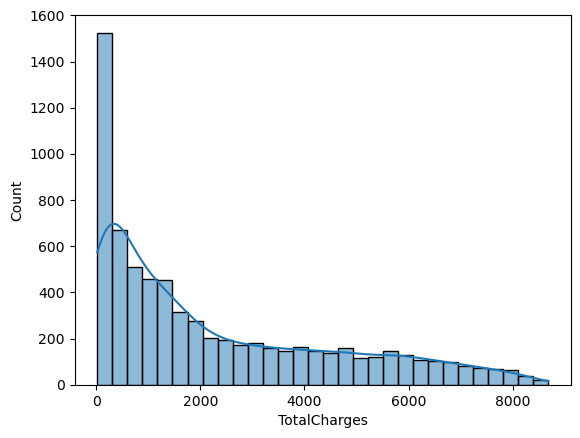

In [50]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
  sns.histplot(df[i],kde=True,bins=30)
  plt.show()

In [51]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

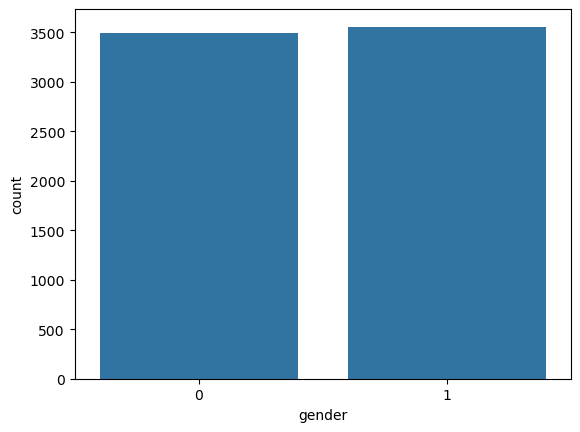

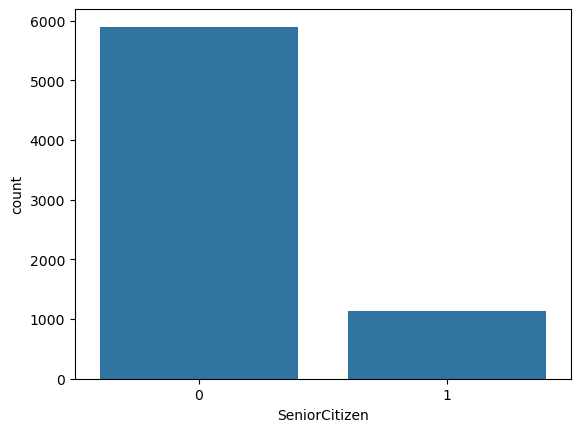

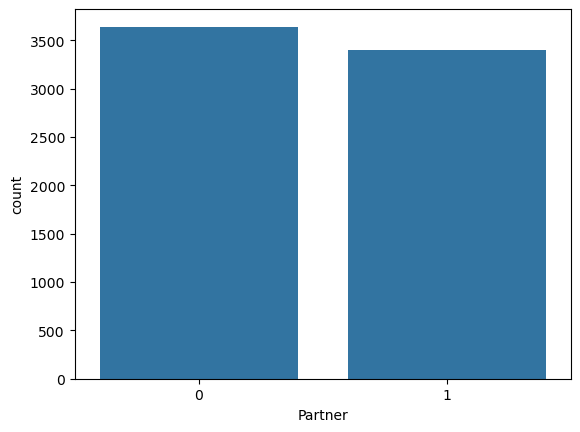

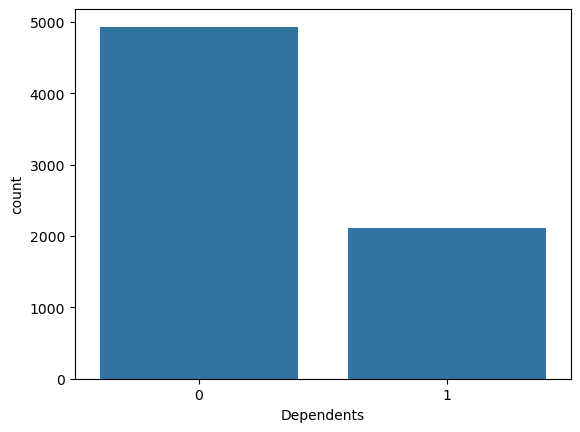

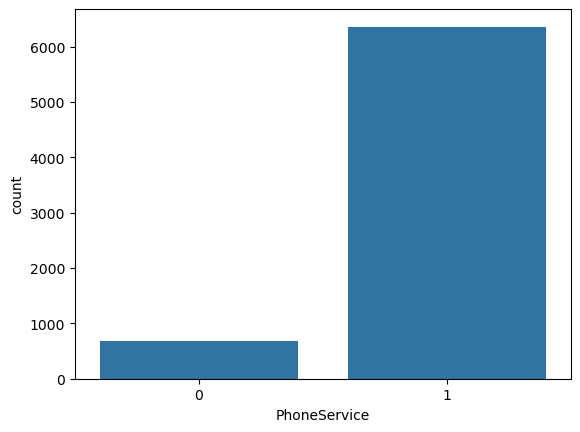

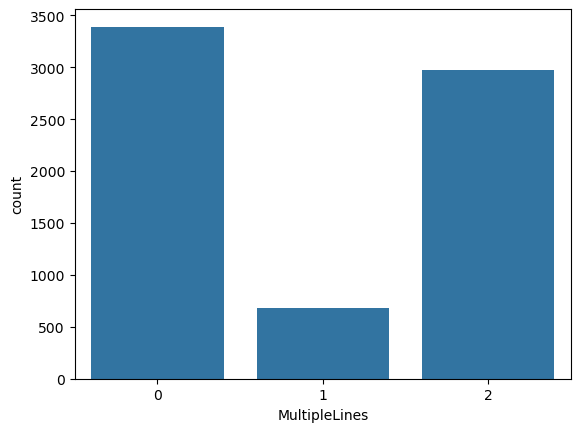

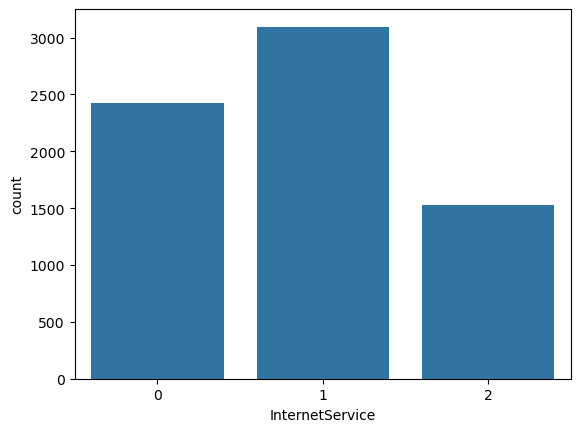

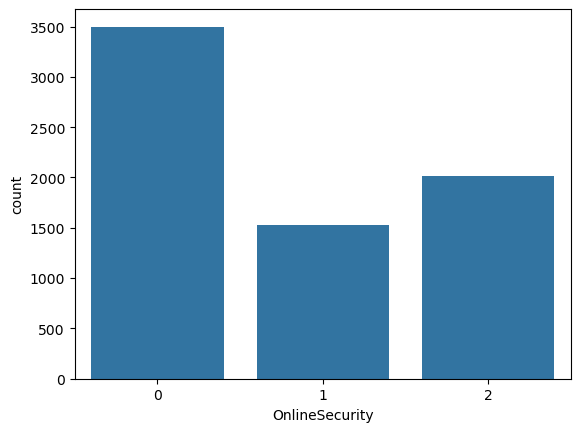

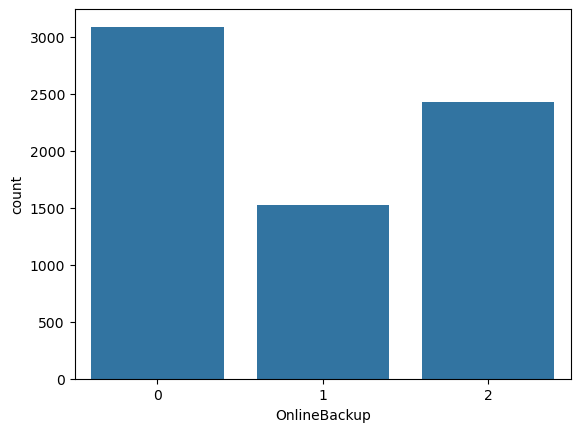

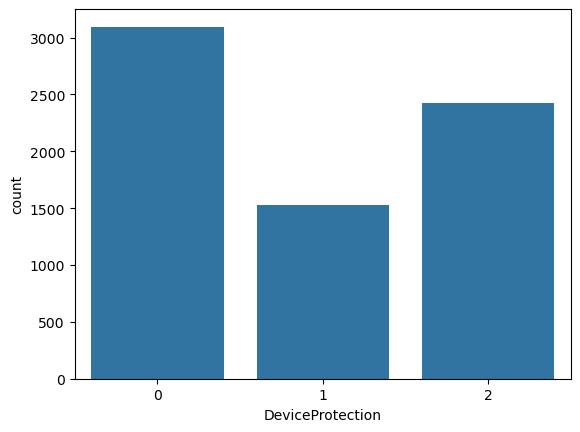

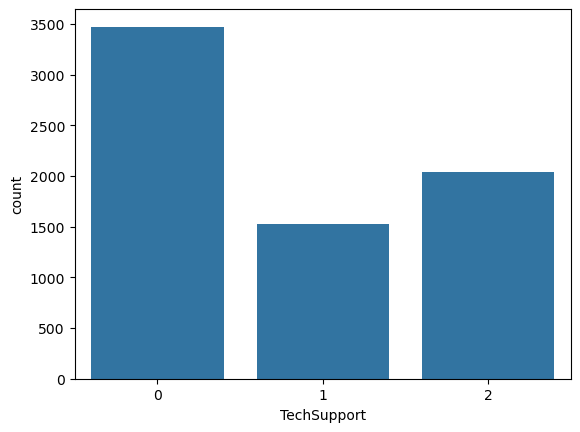

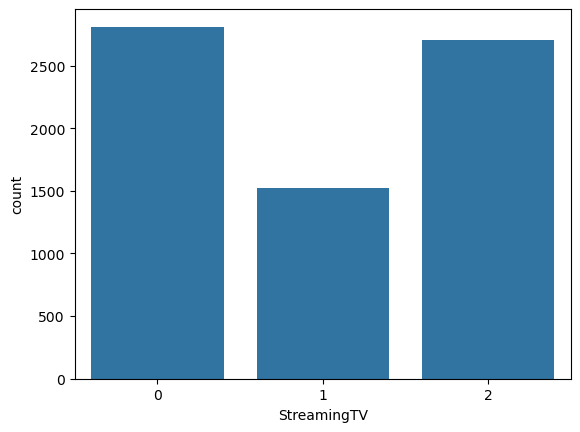

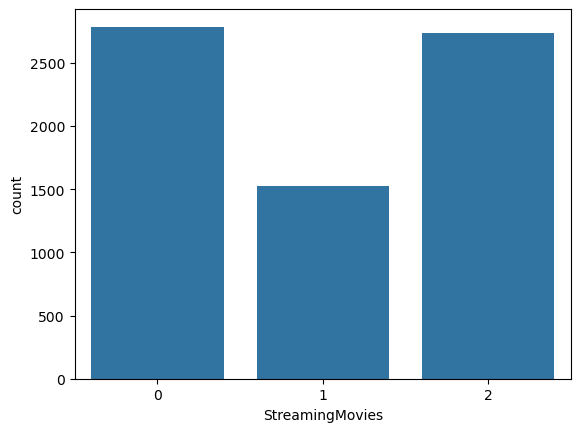

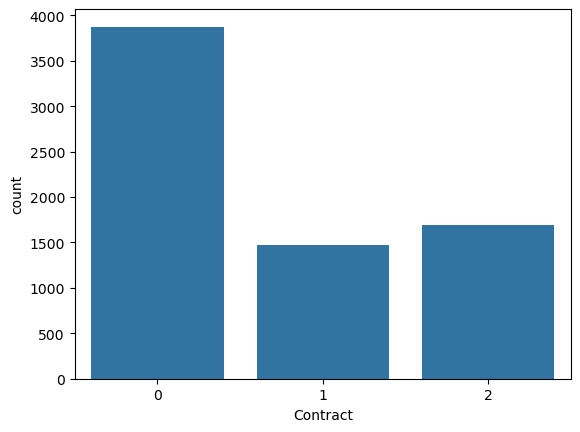

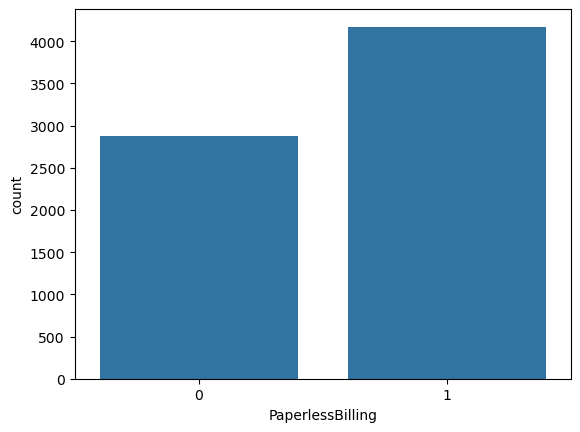

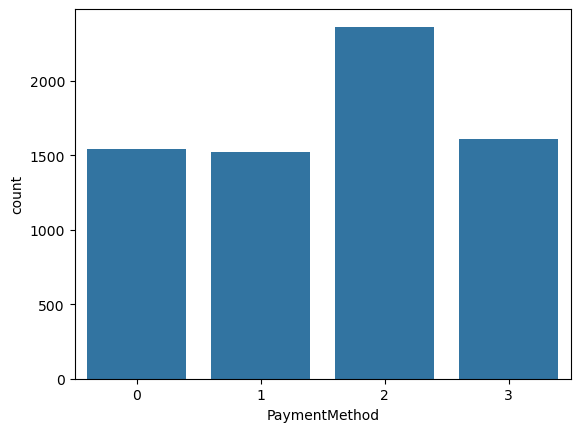

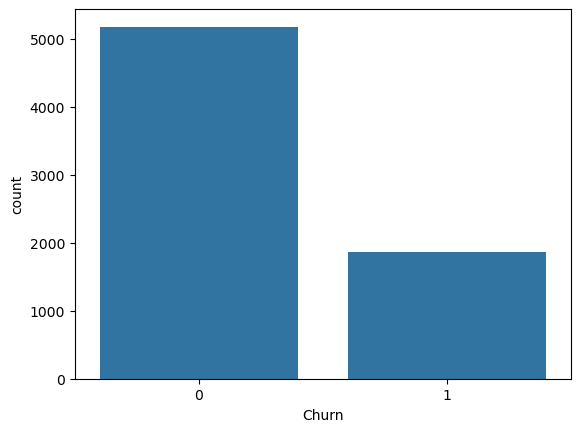

In [52]:
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
     'PaymentMethod','Churn']:
     sns.countplot(x=i,data=df)
     plt.show()

In [53]:
# df1=df[['tenure','MonthlyCharges','TotalCharges']]
# for i in df1.columns:
#   df[i+"_zscore"]=(df[i]-df[i].mean())/df[i].std()
# df

In [54]:
# for i in ['tenure_zscore','MonthlyCharges_zscore','TotalCharges_zscore']:
#   df=(df[(df[i]>-3)&(df[i]<3)])
# df

In [55]:
df.duplicated().sum()

22

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.duplicated().sum()

0

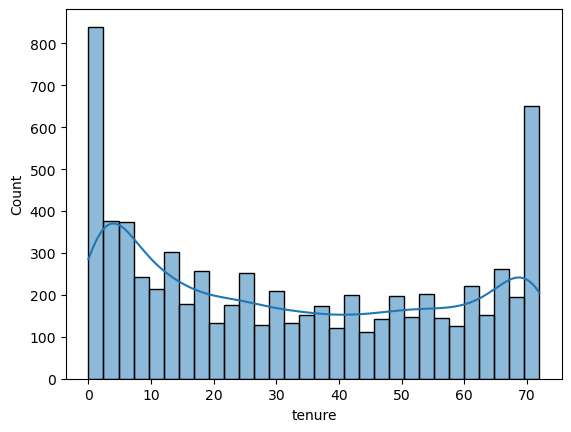

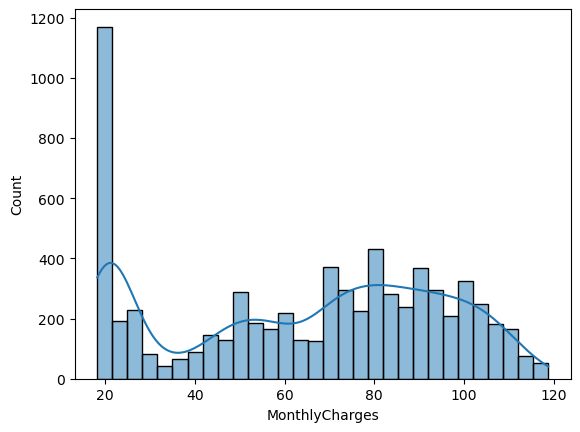

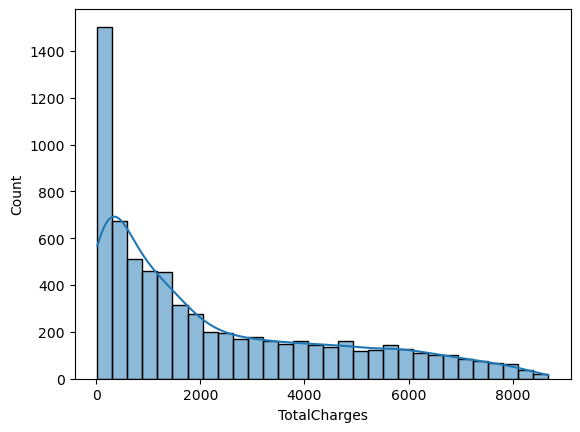

In [58]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
  sns.histplot(df[i],kde=True,bins=30)
  plt.show()

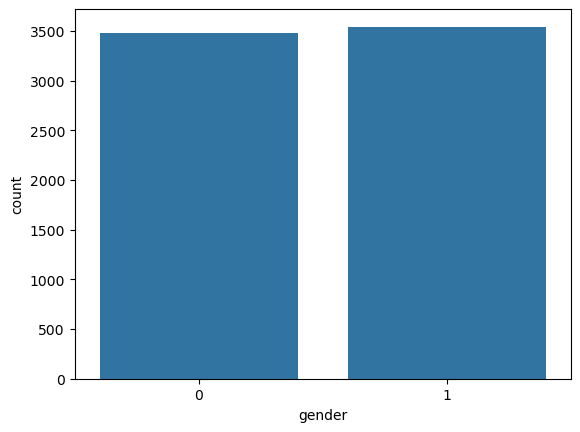

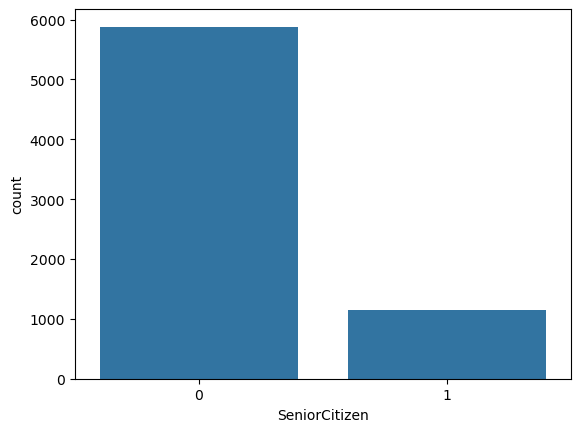

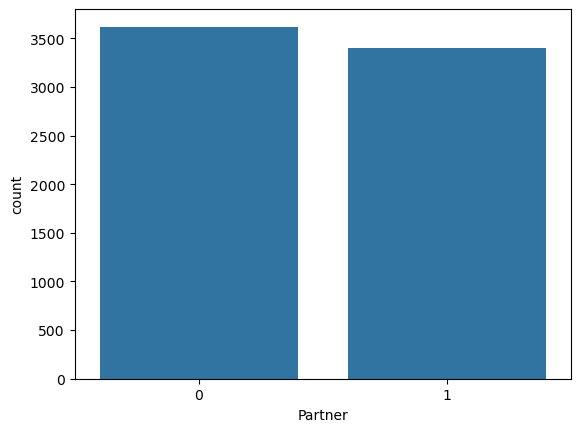

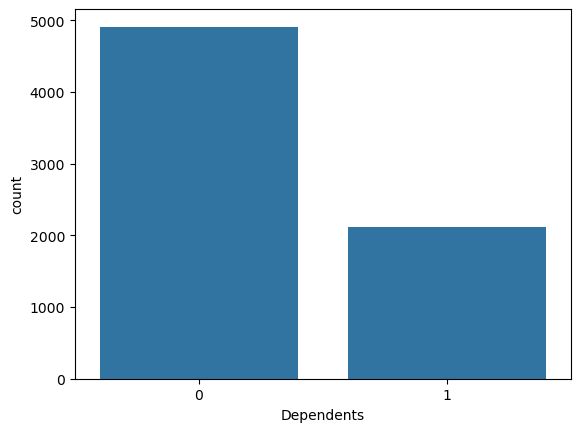

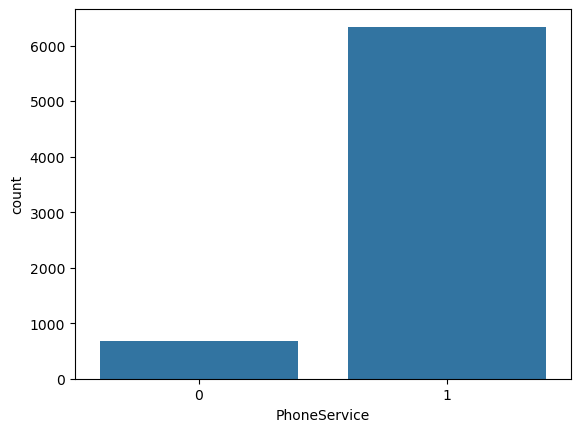

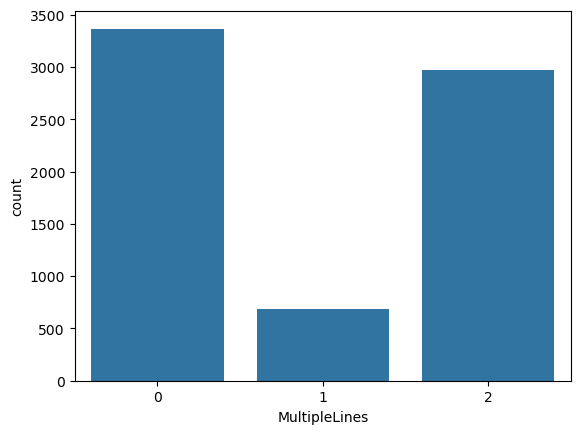

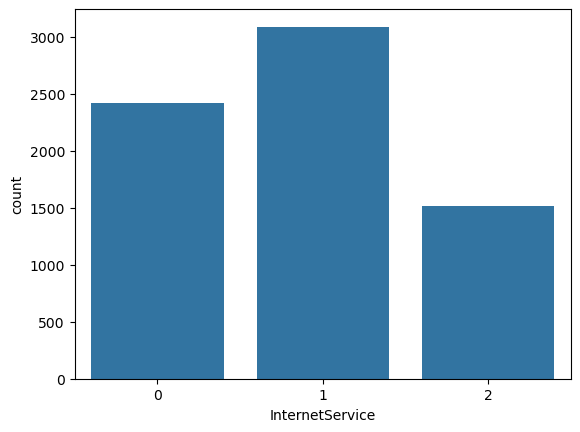

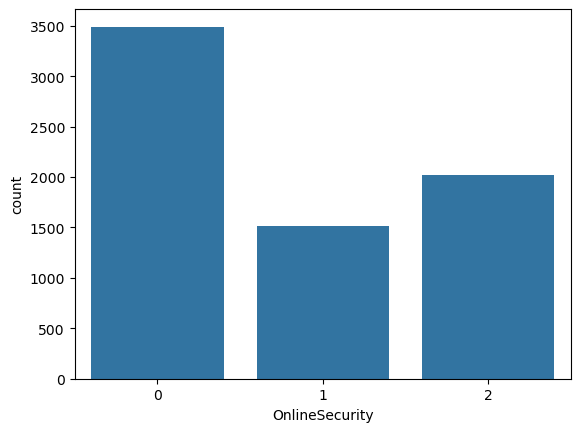

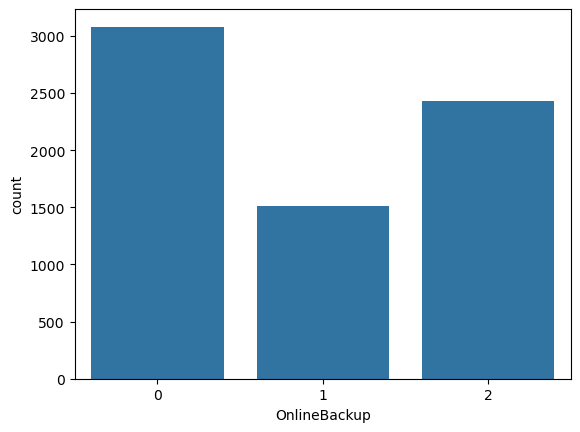

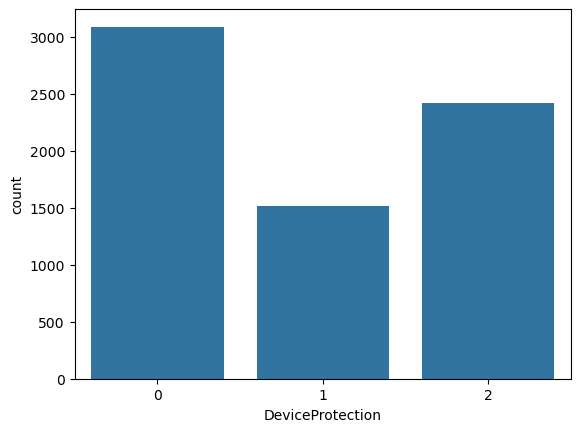

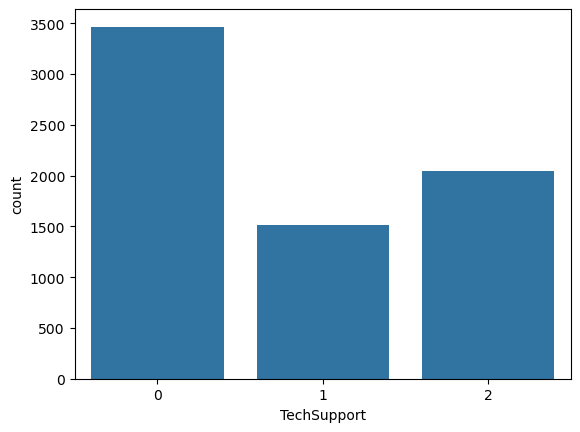

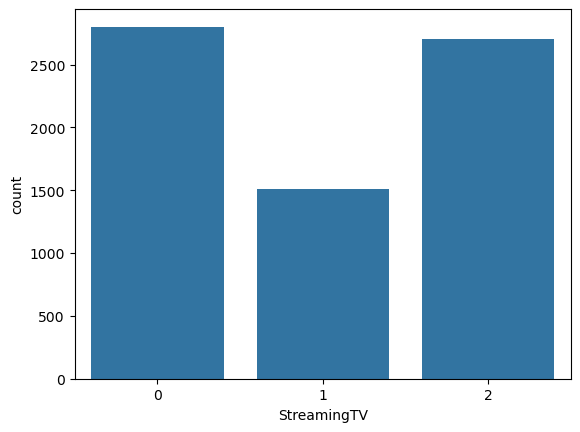

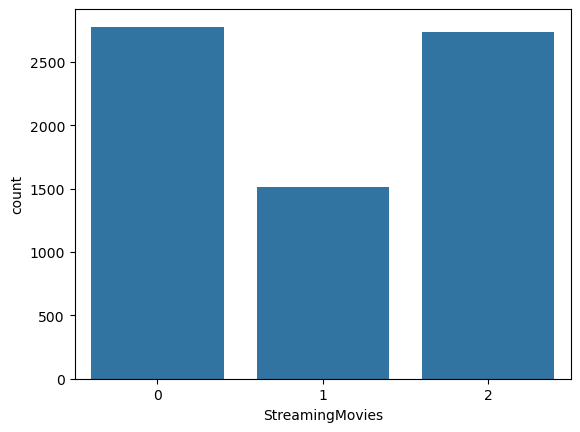

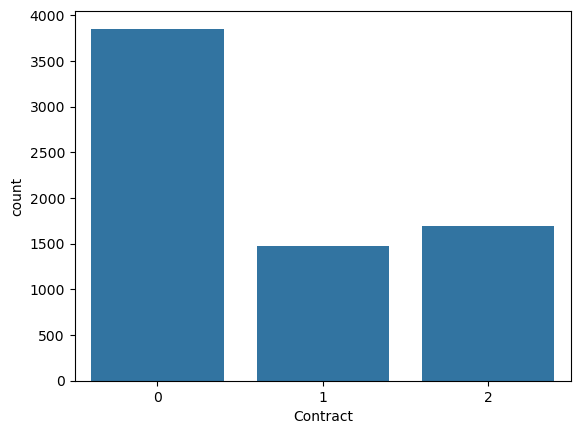

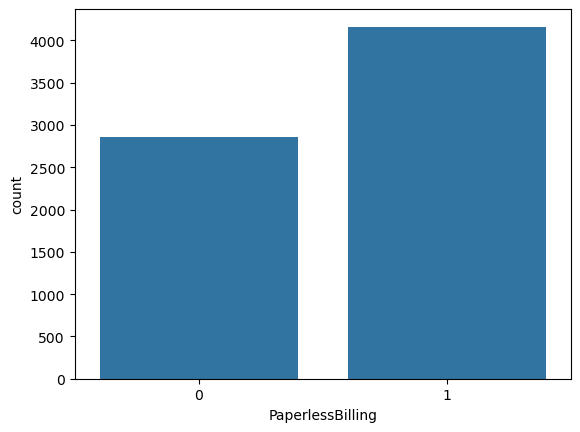

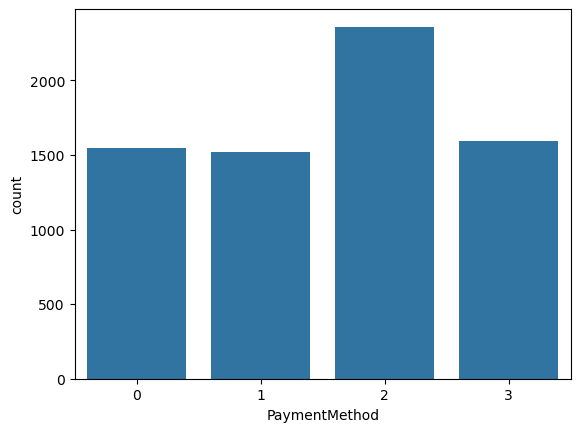

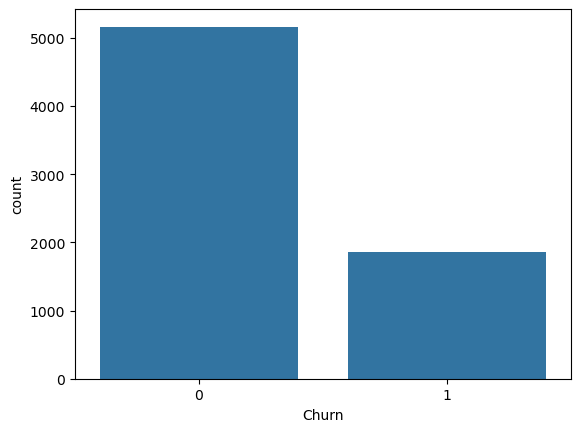

In [295]:
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
     'PaymentMethod','Churn']:
     sns.countplot(x=i,data=df)
     plt.show()

In [296]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'gender': [0 1]
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': [1 0]
Unique values in column 'Dependents': [0 1]
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'PhoneService': [0 1]
Unique values in column 'MultipleLines': [1 0 2]
Unique values in column 'InternetService': [0 1 2]
Unique values in column 'OnlineSecurity': [0 2 1]
Unique values in column 'OnlineBackup': [2 0 1]
Unique values in column 'DeviceProtection': [0 2 1]
Unique values in column 'TechSupport': [0 2 1]
Unique values in column 'StreamingTV': [0 2 1]
Unique values in column 'StreamingMovies': [0 2 1]
Unique values in column 'Contract': [0 1 2]
Unique values in column 'PaperlessBilling': [1 0]
Unique values in column 'PaymentMet

In [297]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


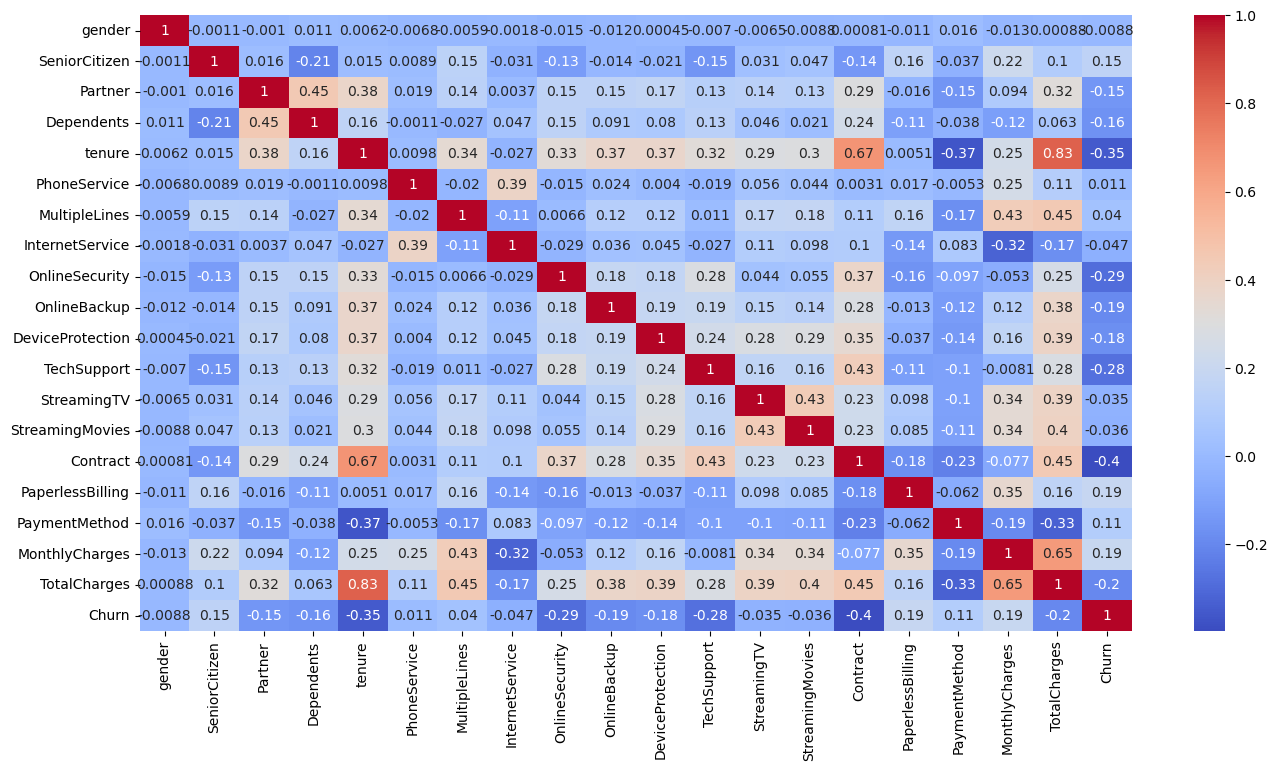

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.198362
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64


In [298]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Correlation with the target variable (Churn)
print(corr_matrix['Churn'].sort_values(ascending=False))


#featureSet 1
MonthlyCharges
PaperlessBilling
SeniorCitizen
PaymentMethod
Partner
Dependents
DeviceProtection
OnlineBackup
TotalCharges
TechSupport
OnlineSecurity
tenure
Contract

In [299]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [300]:
df.dropna(inplace=True)

In [301]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Encode categorical variables as integers
df_encoded = df.copy()
le = LabelEncoder()

for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split the data into features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Apply Chi-square test for feature selection
chi_scores = chi2(X, y)
chi2_scores_df = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_scores[0], "p-value": chi_scores[1]})
print(chi2_scores_df.sort_values(by="Chi2 Score", ascending=False))


             Feature     Chi2 Score        p-value
18      TotalCharges  618734.111185   0.000000e+00
4             tenure   16178.552056   0.000000e+00
17    MonthlyCharges    3674.886450   0.000000e+00
14          Contract    1104.890625  2.857179e-242
8     OnlineSecurity     546.455581  7.431043e-121
11       TechSupport     518.178321  1.054080e-114
9       OnlineBackup     225.882152   4.714235e-51
10  DeviceProtection     187.371545   1.191480e-42
1      SeniorCitizen     134.297582   4.703064e-31
3         Dependents     129.467174   5.359552e-30
15  PaperlessBilling     103.519768   2.578088e-24
2            Partner      79.945683   3.848450e-19
16     PaymentMethod      58.231283   2.330437e-14
6      MultipleLines      10.793234   1.018718e-03
7    InternetService       9.718950   1.823777e-03
13   StreamingMovies       7.499174   6.172730e-03
12       StreamingTV       6.570177   1.037016e-02
0             gender       0.262688   6.082798e-01
5       PhoneService       0.08

#featureSet2
TotalCharges
tenure
MonthlyCharges
Contract
OnlineSecurity
TechSupport
OnlineBackup
DeviceProtection
SeniorCitizen
Dependents
PaperlessBilling
Partner
PaymentMethod
MultipleLines
InternetService
StreamingMovies
StreamingTV

In [302]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
model = LogisticRegression()

# Create RFE object and select top 10 features
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Print selected features
print("Selected Features:", X.columns[fit.support_])
print("Feature Ranking:", fit.ranking_)


Selected Features: Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaperlessBilling'],
      dtype='object')
Feature Ranking: [ 8  1  6  1  1  1  1  3  1  1  2  1  9  7  1  1  4  5 10]


#featureSet3
['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaperlessBilling']

In [303]:
from sklearn.feature_selection import f_classif

# Perform ANOVA F-test
f_values, p_values = f_classif(X, y)

# Create a DataFrame with the results
anova_results = pd.DataFrame({"Feature": X.columns, "F-value": f_values, "p-value": p_values})

# Sort by F-value to see the most important features
print(anova_results.sort_values(by="F-value", ascending=False))


             Feature      F-value        p-value
14          Contract  1303.103916  7.222855e-262
4             tenure   999.755231  3.093127e-205
8     OnlineSecurity   635.025612  3.301585e-134
11       TechSupport   602.630161  9.839031e-128
18      TotalCharges   287.040937   3.914665e-63
17    MonthlyCharges   274.092511   2.021823e-60
9       OnlineBackup   274.007061   2.107002e-60
15  PaperlessBilling   263.951885   2.717509e-58
10  DeviceProtection   225.386079   3.622464e-50
3         Dependents   189.752113   1.288810e-42
1      SeniorCitizen   164.116180   3.717716e-37
2            Partner   158.397158   6.189409e-36
16     PaymentMethod    81.212840   2.574423e-19
7    InternetService    15.627108   7.789960e-05
6      MultipleLines    11.332543   7.657015e-04
13   StreamingMovies     9.504465   2.057691e-03
12       StreamingTV     8.260345   4.064234e-03
5       PhoneService     0.859237   3.539842e-01
0             gender     0.529800   4.667155e-01


#featureSet4
Contract
tenure
OnlineSecurity
TechSupport
TotalCharges
MonthlyCharges
OnlineBackup
PaperlessBilling
DeviceProtection
Dependents
SeniorCitizen
Partner
PaymentMethod
InternetService
MultipleLines
StreamingMovies
StreamingTV



In [304]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split data into features (X) and target (y)
X = df.drop('Churn', axis=1)  # All columns except 'Churn'
y = df['Churn']  # Target variable

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print(classification_report(y_test, y_pred))

importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)



Accuracy: 78.70%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1564
           1       0.61      0.48      0.54       539

    accuracy                           0.79      2103
   macro avg       0.72      0.69      0.70      2103
weighted avg       0.78      0.79      0.78      2103

             Feature  Importance
18      TotalCharges    0.189094
17    MonthlyCharges    0.179458
4             tenure    0.158906
14          Contract    0.080170
16     PaymentMethod    0.051970
8     OnlineSecurity    0.047823
11       TechSupport    0.038050
0             gender    0.028470
15  PaperlessBilling    0.026926
9       OnlineBackup    0.026123
7    InternetService    0.025790
6      MultipleLines    0.023266
2            Partner    0.022448
10  DeviceProtection    0.021651
1      SeniorCitizen    0.020745
3         Dependents    0.020204
13   StreamingMovies    0.017472
12       StreamingTV    0.016789
5       PhoneService    0.004

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

def model_accuracy(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dictionary to store models and their accuracy
    models = {
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    # Dictionary to store accuracy scores
    accuracy_scores = {}

    # Loop through the models and calculate accuracy for each
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)
        # Calculate accuracy
        accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
        # Print classification report
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

    return accuracy_scores

# Example usage:
# accuracy_scores = model_accuracy(X_selected_features, y_target)
# print(accuracy_scores)


In [306]:
accuracy_scores = model_accuracy(X, y)
print(accuracy_scores)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1081
           1       0.60      0.50      0.55       321

    accuracy                           0.81      1402
   macro avg       0.73      0.70      0.71      1402
weighted avg       0.80      0.81      0.80      1402

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1081
           1       0.62      0.58      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.74      0.74      1402
weighted avg       0.82      0.82      0.82      1402

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1081
           1       0.00      0.00      0.00       321

    accuracy                           0.77      1402
   macro 

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

def model_accuracy_with_oversampling(df):
    # Define the target and feature set
    y = df['Churn']
    X = df.drop(['Churn'], axis=1)

    # Apply random oversampling to balance the classes in the training set
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    print("Original class distribution:")
    print(y.value_counts())

    print("Class distribution after oversampling:")
    print(y_resampled.value_counts())

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


    # Dictionary to store models and their accuracy
    models = {
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    # Dictionary to store accuracy scores
    accuracy_scores = {}

    # Loop through the models and calculate accuracy for each
    for model_name, model in models.items():
        # Train the model on the resampled dataset
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)
        # Calculate accuracy
        accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
        # Print classification report
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

    return accuracy_scores

# Example usage:
# accuracy_scores = model_accuracy_with_oversampling(fs4)
# print(accuracy_scores)


In [308]:
accuracy_scores = model_accuracy_with_oversampling(df)
print(accuracy_scores)

Original class distribution:
Churn
0    5153
1    1857
Name: count, dtype: int64
Class distribution after oversampling:
Churn
0    5153
1    5153
Name: count, dtype: int64
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      1036
           1       0.86      0.95      0.90      1026

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.90      0.90      0.90      2062

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1036
           1       0.75      0.79      0.77      1026

    accuracy                           0.77      2062
   macro avg       0.77      0.77      0.77      2062
weighted avg       0.77      0.77      0.77      2062

Classification Report for SVM:
              precision    recall  f1-score   support



#feature selection

In [309]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [310]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, make_scorer, f1_score
# from imblearn.over_sampling import RandomOverSampler

# def model_accuracy_with_oversampling(df):
#     # Define the target and feature set
#     y = df['Churn']
#     X = df.drop(['Churn'], axis=1)

#     # Apply random oversampling to balance the classes in the training set
#     ros = RandomOverSampler(random_state=42)
#     X_resampled, y_resampled = ros.fit_resample(X, y)

#     print("Original class distribution:")
#     print(y.value_counts())

#     print("Class distribution after oversampling:")
#     print(y_resampled.value_counts())

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#     # Define a scorer for F1 score optimization
#     f1_scorer = make_scorer(f1_score, average='binary')

#     # Dictionary to store models and their hyperparameter grids
#     param_grids = {
#         "Random Forest": {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [10, 20, 30],
#             'min_samples_split': [2, 5, 10]
#         },
#         "Logistic Regression": {
#             'C': [0.01, 0.1, 1, 10],
#             'solver': ['liblinear', 'lbfgs'],
#             'max_iter': [500, 1000]
#         },
#         "SVM": {
#             'C': [0.1, 1, 10],
#             'kernel': ['linear', 'rbf'],
#             'gamma': ['scale', 'auto']
#         },
#         "XGBoost": {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 7]
#         }
#     }

#     # Dictionary to store models
#     models = {
#         "Random Forest": RandomForestClassifier(),
#         "Logistic Regression": LogisticRegression(max_iter=1000),
#         "SVM": SVC(),
#         "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
#     }

#     # Dictionary to store the best F1 scores
#     best_f1_scores = {}

#     # Loop through models, perform hyperparameter tuning and calculate F1 score
#     for model_name, model in models.items():
#         print(f"Performing hyperparameter tuning for {model_name}...")
#         param_grid = param_grids[model_name]
#         grid_search = GridSearchCV(model, param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
#         grid_search.fit(X_train, y_train)

#         # Get the best model from grid search
#         best_model = grid_search.best_estimator_

#         # Predict on test set using the best model
#         y_pred = best_model.predict(X_test)

#         # Calculate F1 score
#         best_f1_scores[model_name] = f1_score(y_test, y_pred)

#         # Print the classification report
#         print(f"Best parameters for {model_name}: {grid_search.best_params_}")
#         print(f"Classification Report for {model_name}:")
#         print(classification_report(y_test, y_pred))

#     return best_f1_scores

# # Example usage:
# # accuracy_scores = model_accuracy_with_oversampling(df)
# # print(accuracy_scores)

# accuracy_scores = model_accuracy_with_oversampling(df)
# print(accuracy_scores)


#featureSet 1
df1=df['MonthlyCharges','PaperlessBilling','SeniorCitizen','PaymentMethod','Partner','Dependents','DeviceProtection','OnlineBackup','TotalCharges','TechSupport','OnlineSecurity','tenure','Contract']

#featureSet2
df2=['TotalCharges','tenure','MonthlyCharges','Contract','OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','SeniorCitizen','Dependents','PaperlessBilling','Partner','PaymentMethod','MultipleLines','InternetService','StreamingMovies','StreamingTV']

#featureSet3
df3=['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','Contract','PaperlessBilling']

#featureSet4
df4=['Contract','tenure','OnlineSecurity,'TechSupport','TotalCharges','MonthlyCharges','OnlineBackup','PaperlessBilling','DeviceProtection','Dependents','SeniorCitizen','Partner','PaymentMethod','InternetService','MultipleLines','StreamingMovies','StreamingTV']



#featureSet5
df5=['Contract','TechSupport','tenure','OnlineSecurity','InternetService','OnlineBackup','MonthlyCharges','PaymentMethod','DeviceProtection','TotalCharges']

#featureset6
df6=['MonthlyCharges','tenure','Contract','TotalCharges','PaymentMethod','OnlineSecurity','TechSupport','PaperlessBilling','InternetService','OnlineBackup']

#featureset7
 df7=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

#featureset8
df8=['TotalCharges','MonthlyCharges','tenure','Contract','PaymentMethod','OnlineSecurity','TechSupport','InternetService','gender','OnlineBackup']

#featureset 9

df9=['TotalCharges','tenure','Contract','DeviceProtection','StreamingMovies','MonthlyCharges','PaperlessBilling','SeniorCitizen','MultipleLines','OnlineSecurity','Partner','TechSupport','StreamingTV','PaymentMethod','Dependents']

In [311]:
from sklearn.feature_selection import mutual_info_classif

# Define the target and feature set
y = df['Churn']
X = df.drop(['Churn'], axis=1)

# Compute mutual information
mi = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Select top N features based on mutual information
top_features_mi = mi_scores.head(10).index.tolist()
print(f"Top features using Mutual Information: {top_features_mi}")


Top features using Mutual Information: ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'InternetService', 'DeviceProtection', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'OnlineBackup']


In [312]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Define the target and feature set
y = df['Churn']
X = df.drop(['Churn'], axis=1)

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Compute permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Get feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# Select top N features
top_features_perm = feature_importances.head(10).index.tolist()
print(f"Top features using Permutation Importance: {top_features_perm}")


Top features using Permutation Importance: ['tenure', 'MonthlyCharges', 'Contract', 'TotalCharges', 'OnlineSecurity', 'PaymentMethod', 'TechSupport', 'PaperlessBilling', 'InternetService', 'MultipleLines']


In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the target and feature set
y = df['Churn']
X = df.drop(['Churn'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Logistic Regression with L1 regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_scaled, y)

# Get coefficients of the features
coefficients = pd.Series(lasso.coef_[0], index=X.columns)
top_features_lasso = coefficients[coefficients != 0].index.tolist()
print(f"Top features using L1 Regularization (Lasso): {top_features_lasso}")


Top features using L1 Regularization (Lasso): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [314]:
from sklearn.ensemble import RandomForestClassifier

# Define the target and feature set
y = df['Churn']
X = df.drop(['Churn'], axis=1)

# Train a random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top N features
top_features_rf = feature_importances.head(10).index.tolist()
print(f"Top features using RandomForest Feature Importance: {top_features_rf}")


Top features using RandomForest Feature Importance: ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'InternetService', 'gender', 'OnlineBackup']


In [315]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the target and feature set
y = df['Churn']
X = df.drop(['Churn'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio of each component
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")


Explained variance by each component: [0.22195017 0.12193544 0.07864725 0.06390585 0.05675785 0.05273944
 0.04980781 0.0454966  0.04279403 0.04095823]


In [316]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the target and feature set
y = df['Churn']
X = df.drop(['Churn'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Set the number of components
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

# Get the PCA components
pca_components = pd.DataFrame(pca.components_, columns=X.columns)

# Print the top contributing features for each principal component
for i in range(pca.n_components):
    # Get the top contributing features for this component
    top_features = pca_components.iloc[i].nlargest(5).index.tolist()  # Top 5 features for each component
    print(f"Top features for component {i + 1}: {top_features}")


Explained variance by each component: [0.22195017 0.12193544 0.07864725 0.06390585 0.05675785 0.05273944
 0.04980781 0.0454966  0.04279403 0.04095823]
Top features for component 1: ['TotalCharges', 'tenure', 'Contract', 'DeviceProtection', 'StreamingMovies']
Top features for component 2: ['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'MultipleLines', 'TotalCharges']
Top features for component 3: ['OnlineSecurity', 'MultipleLines', 'tenure', 'Partner', 'TechSupport']
Top features for component 4: ['TechSupport', 'DeviceProtection', 'StreamingMovies', 'OnlineSecurity', 'StreamingTV']
Top features for component 5: ['StreamingTV', 'StreamingMovies', 'PaymentMethod', 'Dependents', 'DeviceProtection']
Top features for component 6: ['gender', 'SeniorCitizen', 'tenure', 'InternetService', 'Contract']
Top features for component 7: ['SeniorCitizen', 'InternetService', 'Partner', 'DeviceProtection', 'Contract']
Top features for component 8: ['PaymentMethod', 'OnlineBackup', 'SeniorCitize

In [317]:
#featureSet 1
df1=df[['MonthlyCharges','PaperlessBilling','SeniorCitizen','PaymentMethod','Partner','Dependents','DeviceProtection','OnlineBackup','TotalCharges','TechSupport','OnlineSecurity','tenure','Contract']]

#featureSet2
df2=df[['TotalCharges','tenure','MonthlyCharges','Contract','OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','SeniorCitizen','Dependents','PaperlessBilling','Partner','PaymentMethod','MultipleLines','InternetService','StreamingMovies','StreamingTV']]

#featureSet3
df3=df[['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','Contract','PaperlessBilling']]

#featureSet4
df4=df[['Contract','tenure','OnlineSecurity','TechSupport','TotalCharges','MonthlyCharges','OnlineBackup','PaperlessBilling','DeviceProtection','Dependents','SeniorCitizen','Partner','PaymentMethod','InternetService','MultipleLines','StreamingMovies','StreamingTV']]

#featureSet5
df5=df[['Contract','TechSupport','tenure','OnlineSecurity','InternetService','OnlineBackup','MonthlyCharges','PaymentMethod','DeviceProtection','TotalCharges']]

#featureset6
df6=df[['MonthlyCharges','tenure','Contract','TotalCharges','PaymentMethod','OnlineSecurity','TechSupport','PaperlessBilling','InternetService','OnlineBackup']]

#featureset7
df7=df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

#featureset8
df8=df[['TotalCharges','MonthlyCharges','tenure','Contract','PaymentMethod','OnlineSecurity','TechSupport','InternetService','gender','OnlineBackup']]

#featureset 9

df9=df[['TotalCharges','tenure','Contract','DeviceProtection','StreamingMovies','MonthlyCharges','PaperlessBilling','SeniorCitizen','MultipleLines','OnlineSecurity','Partner','TechSupport','StreamingTV','PaymentMethod','Dependents']]



In [318]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

def model_accuracy_with_oversampling(X, y):
    # Apply random oversampling to balance the classes in the training set
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    print("Original class distribution:")
    print(y.value_counts())

    print("Class distribution after oversampling:")
    print(y_resampled.value_counts())

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Dictionary to store models and their accuracy
    models = {
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    # Dictionary to store accuracy scores
    accuracy_scores = {}

    # Loop through the models and calculate accuracy for each
    for model_name, model in models.items():
        # Train the model on the resampled dataset
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)
        # Calculate accuracy
        accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
        # Print classification report
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

    return accuracy_scores


# List of feature sets and names
feature_sets = [
    ("Feature Set 1", df1),
    ("Feature Set 2", df2),
    ("Feature Set 3", df3),
    ("Feature Set 4", df4),
    ("Feature Set 5", df5),
    ("Feature Set 6", df6),
    ("Feature Set 7", df7),
    ("Feature Set 8", df8),
    ("Feature Set 9", df9)
]

# Define the target variable
y = df['Churn']

# Loop through each feature set and get model accuracy
for set_name, feature_set in feature_sets:
    print(f"\nTraining models on {set_name}")
    accuracy_scores = model_accuracy_with_oversampling(feature_set, y)
    print(f"Accuracy scores for {set_name}: {accuracy_scores}")



Training models on Feature Set 1
Original class distribution:
Churn
0    5153
1    1857
Name: count, dtype: int64
Class distribution after oversampling:
Churn
0    5153
1    5153
Name: count, dtype: int64
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1036
           1       0.86      0.94      0.90      1026

    accuracy                           0.89      2062
   macro avg       0.90      0.89      0.89      2062
weighted avg       0.90      0.89      0.89      2062

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1036
           1       0.74      0.79      0.76      1026

    accuracy                           0.76      2062
   macro avg       0.76      0.76      0.76      2062
weighted avg       0.76      0.76      0.76      2062

Classification Report for SVM:
              precisi

In [321]:
X=df6
y=df['Churn']
ros=RandomOverSampler(random_state=42)
X_rs,y_rs=ros.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_rs,y_rs,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy SCore : {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy SCore : 0.8957322987390882
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1036
           1       0.85      0.96      0.90      1026

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.90      0.90      0.90      2062



In [320]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import RandomOverSampler

# # Define X and y
# X = df6
# y = df['Churn']

# # Apply Random Oversampling
# ros = RandomOverSampler(random_state=42)
# X_rs, y_rs = ros.fit_resample(X, y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)

# # Set up hyperparameter grid for RandomForestClassifier
# param_grid = {
#     'n_estimators': [100, 200, 300],     # Number of trees in the forest
#     'max_depth': [10, 20, 30],           # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required at a leaf node
#     'bootstrap': [True, False]           # Whether bootstrap samples are used
# }

# # Initialize RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the model with GridSearchCV to find the best parameters
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found by GridSearchCV
# print(f"Best Hyperparameters: {grid_search.best_params_}")

# # Use the best estimator (tuned RandomForest) to make predictions
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy Score: {accuracy}")

# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy Score: 0.902521823472357
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1036
           1       0.87      0.94      0.91      1026

    accuracy                           0.90      2062
   macro avg       0.91      0.90      0.90      2062
weighted avg       0.91      0.90      0.90      2062



In [322]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Define X and y
X = df6
y = df['Churn']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)


# Initialize RandomForestClassifier
rf = RandomForestClassifier( bootstrap=False, 
    max_depth=20, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.902521823472357
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1036
           1       0.87      0.94      0.91      1026

    accuracy                           0.90      2062
   macro avg       0.91      0.90      0.90      2062
weighted avg       0.91      0.90      0.90      2062



In [323]:
X=df4
y=df['Churn']
ros=RandomOverSampler(random_state=42)
X_rs,y_rs=ros.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_rs,y_rs,test_size=0.2,random_state=42)
model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy SCore : {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy SCore : 0.8564500484966052
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.82      0.91      0.86      1026

    accuracy                           0.86      2062
   macro avg       0.86      0.86      0.86      2062
weighted avg       0.86      0.86      0.86      2062



In [324]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Define X and y
X = df4
y = df['Churn']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)

# Set up hyperparameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                 # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.3],      # Step size shrinkage
    'subsample': [0.8, 1],                  # Subsample ratio of the training data
    'colsample_bytree': [0.8, 1],           # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3]                  # Minimum loss reduction required to make a split
}

# Initialize XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Use the best estimator (tuned XGBClassifier) to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Hyperparameters: {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Accuracy Score: 0.8855480116391853
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1036
           1       0.84      0.95      0.89      1026

    accuracy                           0.89      2062
   macro avg       0.89      0.89      0.89      2062
weighted avg       0.89      0.89      0.89      2062



In [326]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Define X and y
X = df4
y = df['Churn']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)


# Initialize XGBClassifier
xgb = XGBClassifier(colsample_bytree= 1, gamma= 0.1, learning_rate= 0.3, max_depth= 7, n_estimators= 300, subsample= 0.8,use_label_encoder=False, eval_metric='mlogloss', random_state=42)


# Fit the model with GridSearchCV to find the best parameters
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.8855480116391853
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1036
           1       0.84      0.95      0.89      1026

    accuracy                           0.89      2062
   macro avg       0.89      0.89      0.89      2062
weighted avg       0.89      0.89      0.89      2062



In [329]:
#ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Define X and y
X = df6  # Assuming df6 is defined
y = df['Churn']  # Assuming df is defined

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',bootstrap=False, 
                             max_depth=20, 
                             min_samples_leaf=1, 
                             min_samples_split=2, 
                             n_estimators=200, 
                             random_state=42)

# Initialize XGBClassifier
xgb = XGBClassifier(colsample_bytree=1, 
                    gamma=0.1, 
                    learning_rate=0.3, 
                    max_depth=7, 
                    n_estimators=300, 
                    subsample=0.8, 
                    use_label_encoder=False, 
                    eval_metric='mlogloss', 
                    random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf),
    ('xgboost', xgb)],
    voting='soft')  # Use 'soft' for probability-based voting, 'hard' for majority voting

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.8986420950533462
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      1036
           1       0.86      0.95      0.90      1026

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.90      0.90      0.90      2062



In [331]:
import joblib
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create a stacking classifier
stacked_model = StackingClassifier(estimators=[
    ('random_forest', rf),
    ('xgboost', xgb)],
    final_estimator=LogisticRegression())

# Fit the model
stacked_model.fit(X_train, y_train)
joblib.dump(stacked_model,'stacked_model.joblib')
# Make predictions
y_pred_stacked = stacked_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy Score (Stacked Model): {accuracy_stacked}")
print("Classification Report (Stacked Model):")
print(classification_report(y_test, y_pred_stacked))


Accuracy Score (Stacked Model): 0.9136760426770126
Classification Report (Stacked Model):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1036
           1       0.90      0.94      0.92      1026

    accuracy                           0.91      2062
   macro avg       0.91      0.91      0.91      2062
weighted avg       0.91      0.91      0.91      2062



In [332]:
df6.columns

Index(['MonthlyCharges', 'tenure', 'Contract', 'TotalCharges', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'InternetService',
       'OnlineBackup'],
      dtype='object')

In [335]:
dft=df[['MonthlyCharges', 'tenure', 'Contract', 'TotalCharges', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'InternetService',
       'OnlineBackup','Churn']]

In [336]:
dft.head()

,MonthlyCharges,tenure,Contract,TotalCharges,PaymentMethod,OnlineSecurity,TechSupport,PaperlessBilling,InternetService,OnlineBackup,Churn
0,29.85,1,0,29.85,2,0,0,1,0,2,0
1,56.95,34,1,1889.50,3,2,0,0,0,0,0
2,53.85,2,0,108.15,3,2,0,1,0,2,1
3,42.30,45,1,1840.75,0,2,2,0,0,0,0
4,70.70,2,0,151.65,2,0,0,1,1,0,1
